In [1]:
import tensorflow as tf
%load_ext tensorboard.notebook
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Softmax, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import datetime
from utils import *

In [3]:
train_dir = os.path.join('images', 'train')
valid_dir = os.path.join('images', 'validation')
test_dir = os.path.join('images', 'test')

class_names = ['point_foreward', 'curl'] # in the prediction output, the order is point_foreward (0), point_up (1), curl (2)

In [4]:
batch_size = 16
epochs = 10
HEIGHT=75
WIDTH=75


In [5]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
#     horizontal_flip=True,
    zoom_range=0.5
)
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=128,
    directory=train_dir,
    shuffle=True,
    target_size=(HEIGHT, WIDTH),
    classes=class_names,
    class_mode='binary'
)
valid_image_generator = ImageDataGenerator(
    rescale=1./255,
)
valid_data_gen = valid_image_generator.flow_from_directory(
    batch_size=128,
    directory=valid_dir,
    shuffle=True,
    target_size=(HEIGHT, WIDTH),
    classes=class_names,
    class_mode='binary'
)

Found 1373 images belonging to 2 classes.
Found 155 images belonging to 2 classes.


In [6]:
# train_dir = os.path.join('..', 'detect_classify_images', 'failed')

total_train = 0
total_val = 0
images = []
labels = []
for i, direc in enumerate(class_names):
    train_class_dir = os.path.join(train_dir, direc)
    files = os.listdir(train_class_dir)
    total_train += len(files)
    for f in files:
        image = cv2.imread(os.path.join(train_class_dir, f))
        image = image / 255.0
        image = cv2.resize(image, (HEIGHT, WIDTH)) 
        images.append(image)
        labels.append(i)
        
    valid_class_dir = os.path.join(valid_dir, direc)
    files = os.listdir(valid_class_dir)
    total_val += len(files)
        
images = np.array(images)
labels = np.array(labels)

In [7]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(HEIGHT, WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [9]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=valid_data_gen,
    validation_steps=total_val // batch_size
)
# history = model.fit(images, labels, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
11/11 [==============================] - 7s 615ms/step - loss: 0.7037 - acc: 0.1719 - val_loss: 0.6662 - val_acc: 0.7161
Epoch 2/10
11/11 [==============================] - 5s 447ms/step - loss: 0.6394 - acc: 0.5200 - val_loss: 0.4907 - val_acc: 0.8903
Epoch 3/10
11/11 [==============================] - 5s 462ms/step - loss: 0.5292 - acc: 0.5441 - val_loss: 0.3514 - val_acc: 0.7871
Epoch 4/10
11/11 [==============================] - 5s 467ms/step - loss: 0.5159 - acc: 0.5382 - val_loss: 0.3348 - val_acc: 0.6065
Epoch 5/10
11/11 [==============================] - 5s 490ms/step - loss: 0.4807 - acc: 0.4945 - val_loss: 0.3034 - val_acc: 0.6000
Epoch 6/10
11/11 [==============================] - 6s 524ms/step - loss: 0.4113 - acc: 0.5222 - val_loss: 0.2716 - val_acc: 0.6000
Epoch 7/10
11/11 [==============================] - 8s 687ms/step - loss: 0.4432 - acc: 0.5477 - val_loss: 0.2749 - val_acc: 0.5742
Epoch 8/10
11/11 [==========

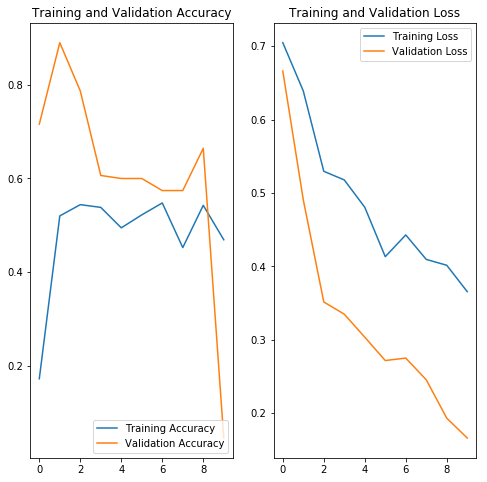

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()